# Grey Model (1,1): Forecasting the next 5 and 10 years in Australia

- This file has predictions and plots for the next 5 and 10 years by each Australian state/territory.
- It was applied Grey Model (1,1).
- Upload and open **data_exclu_20-21.xlsx**.

**Instructions:**

1. Go to `excel_data` folder.
2. Upload `data_exclu_20-21.xlsx` file.



# Load Libraries and file







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data_exclu_20-21.xlsx to data_exclu_20-21 (1).xlsx


In [ ]:
df=pd.read_excel("data_exclu_20-21.xlsx")
df = df.set_index("Years")
df.head()

,New South Wales DT PENALTY,Victoria DT PENALTY,Queensland DT PENALTY,South Australia DT PENALTY,Western Australia DT PENALTY,Tasmania DT PENALTY,Northern Territory DT PENALTY,Australian Capital Territory DT PENALTY
Years,,,,,,,,
2004,0.244721,0.239940,0.239054,0.233094,0.301269,0.213764,0.176080,0.075437
2005,0.221166,0.234375,0.219551,0.208618,0.287900,0.187188,0.157557,0.069489
2006,0.218037,0.224744,0.205560,0.178302,0.292060,0.168992,0.150604,0.059752
2007,0.228100,0.224917,0.205533,0.171678,0.266465,0.211929,0.171503,0.095288
2008,0.214805,0.214003,0.185867,0.203397,0.270978,0.227519,0.164228,0.069899


# Predict the next 5 years


In [ ]:
#Save the state/territory names into a list called "territories"
territories = list(df.columns.values)

#Save the predictions by each state in a dataframe called "predictions"
predictions = pd.DataFrame()

# iterate on each state and only selected the first 12 data points for training.
#Save the values into a list
for states in territories:
    select_values = df[states][0:12]
    col_list = select_values.values.tolist()



######################## Grey Model calculations ########################
#If you have some questions about mathematical calculation please check this
# article "Modeling Method of the Grey GM(1,1) Model with Interval Grey Action Quantity and Its Application"
#it can be found into folder Articles -> GM11 pdf file

    def accumu(lis):
        total = 0
        for x in lis:
            total += x
            yield total

    x1 = list(accumu(col_list))
    def avg(lis):
        pre = lis[0]
        for x in lis:
            avgVal = (pre + x)/2
            pre = x
            yield avgVal
    z1 = [x * -1 for x in list(avg(x1))]


    z1 = np.delete(z1, 0)
    B = pd.DataFrame({states:z1})
    B['1']  = 1
    B_ = B.to_numpy()
    B_t = B.transpose().to_numpy()
    E1_pre = B_t.dot(B_)

    E1 = np.linalg.inv(E1_pre)
    Xn = np.delete(col_list ,0)
    E2 = B_t.dot(Xn)

    parameter = E1.dot(E2)

    a = parameter.item(0)
    b = parameter.item(1)

# This section calculate the preditions.
    pred=[col_list[0]]
    k=1
    while k< len(col_list)+ 16:
      pred_val=((col_list[0] - (b/a)) * math.exp(-1*a*(k)) + (b/a))
      pred.append(pred_val)
      k+=1

    x_pred = [col_list[0]]
    k = 1
    while k < len(col_list)+16:
      x_pred.append(pred[k]-pred[k-1])
      k += 1

#Save predicitions by state and add a column named "Year" and set it as a index
    predictions[states]=x_pred
    predictions["Years "]=range(2004, 2032)
    predictions=predictions.set_index("Years ")

# Future predictions: 5 years

In [ ]:
#Save the predictions in a new dataframe called "pred_5_years"
#Select only the 5 years (from 2022 to 2026)

pred_5_years=predictions.copy()
pred_5_years=pred_5_years.iloc[18:23]
pred_5_years

,New South Wales DT PENALTY,Victoria DT PENALTY,Queensland DT PENALTY,South Australia DT PENALTY,Western Australia DT PENALTY,Tasmania DT PENALTY,Northern Territory DT PENALTY,Australian Capital Territory DT PENALTY
Years,,,,,,,,
2022,0.147596,0.127418,0.101233,0.118450,0.230827,0.092788,0.225322,0.042243
2023,0.143840,0.122893,0.096731,0.114980,0.227924,0.088613,0.229059,0.040834
2024,0.140181,0.118529,0.092429,0.111612,0.225057,0.084626,0.232858,0.039472
2025,0.136614,0.114320,0.088318,0.108342,0.222226,0.080818,0.236720,0.038155
2026,0.133138,0.110260,0.084390,0.105169,0.219431,0.077181,0.240646,0.036883


In [ ]:
# Rename columns for easy and compatibility find it.
pred_5_years=pred_5_years.rename(columns={'New South Wales DT PENALTY': 'NSW', 'Victoria DT PENALTY': 'VIC',
                                      'Queensland DT PENALTY': 'QLD', 'South Australia  DT PENALTY':'SA',
                                      'Western Australia DT PENALTY':'WA', 'Tasmania DT PENALTY': 'TAS',
                                      'Northern Territory DT PENALTY': 'NT','Australian Capital Territory DT PENALTY':'ACT'})

real_values=df.copy()
real_values=real_values.rename(columns={'New South Wales DT PENALTY': 'NSW', 'Victoria DT PENALTY': 'VIC',
                                      'Queensland DT PENALTY': 'QLD', 'South Australia  DT PENALTY':'SA',
                                      'Western Australia DT PENALTY':'WA', 'Tasmania DT PENALTY': 'TAS',
                                      'Northern Territory DT PENALTY': 'NT','Australian Capital Territory DT PENALTY':'ACT'})

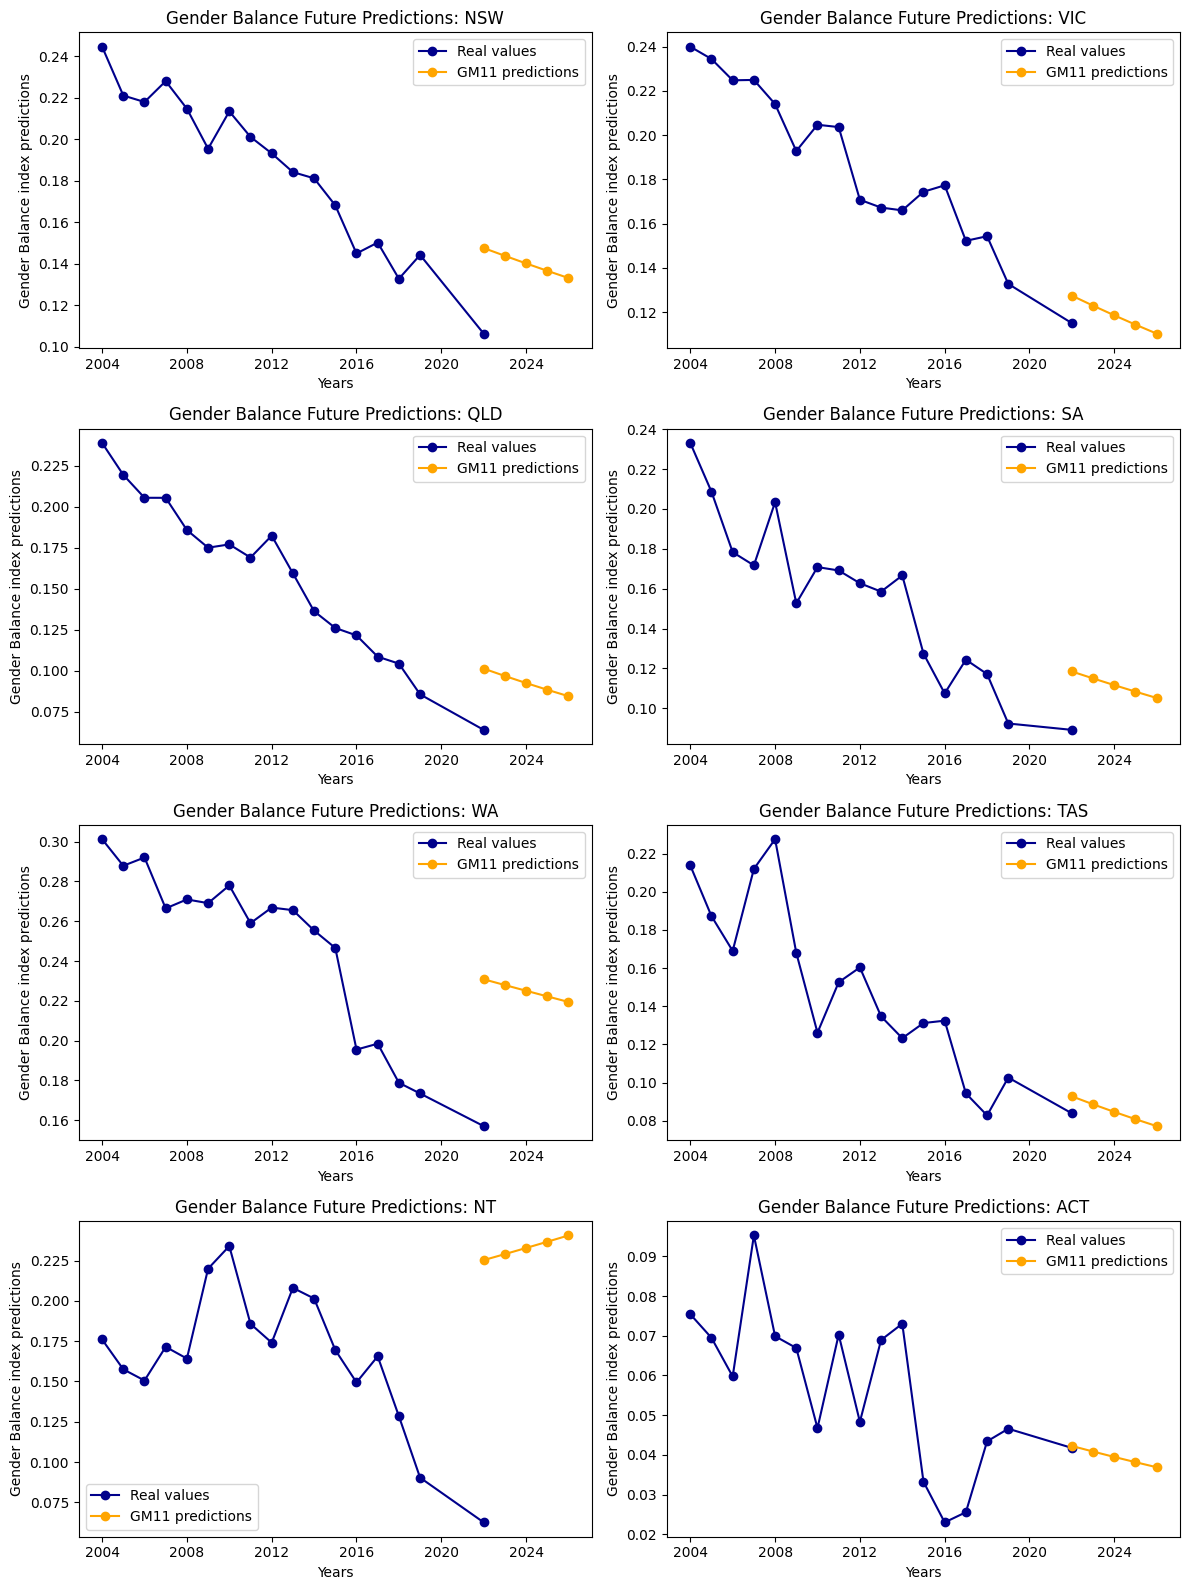

In [ ]:
# Define the list of territories for the second dataset
territories_au = list(real_values.columns.values)  # Replace df_2 with your second dataset

# Create subplots with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each territory
for i, state in enumerate(territories_au):
    # Plot real data from the first dataset
    axs[i].plot(real_values.index, real_values[state], label='Real values',color='darkblue',  marker='o')
    # Plot predictions from the first dataset
    axs[i].plot(pred_5_years.index, pred_5_years[state], label='GM11 predictions', color='orange', marker='o')
    # Set x-axis ticks and labels from 2004 to 2022 in steps of 2
    axs[i].set_xticks(ticks=np.arange(2004, 2028, 4))
    axs[i].set_xticklabels(labels=np.arange(2004, 2028, 4))



    # Set labels and title
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Gender Balance index predictions')
    axs[i].set_title(f'Gender Balance Future Predictions: {state}')
    # Add legend
    axs[i].legend()
    # Hide grid
    axs[i].grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Future predictions: 10 years

In case, you want to add 10 years.

In [ ]:
#Save the predictions in a new dataframe which will be easy to identify
pred_10_years=predictions.copy()
# Select the last 10 years predictions.
pred_10_years=pred_10_years.iloc[18:33]
pred_10_years

,New South Wales DT PENALTY,Victoria DT PENALTY,Queensland DT PENALTY,South Australia DT PENALTY,Western Australia DT PENALTY,Tasmania DT PENALTY,Northern Territory DT PENALTY,Australian Capital Territory DT PENALTY
Years,,,,,,,,
2022,0.147596,0.127418,0.101233,0.118450,0.230827,0.092788,0.225322,0.042243
2023,0.143840,0.122893,0.096731,0.114980,0.227924,0.088613,0.229059,0.040834
2024,0.140181,0.118529,0.092429,0.111612,0.225057,0.084626,0.232858,0.039472
2025,0.136614,0.114320,0.088318,0.108342,0.222226,0.080818,0.236720,0.038155
2026,0.133138,0.110260,0.084390,0.105169,0.219431,0.077181,0.240646,0.036883
2027,0.129751,0.106344,0.080636,0.102088,0.216672,0.073709,0.244637,0.035653
2028,0.126450,0.102568,0.077050,0.099097,0.213947,0.070392,0.248694,0.034464
2029,0.123232,0.098926,0.073623,0.096194,0.211256,0.067224,0.252818,0.033314
2030,0.120097,0.095413,0.070348,0.093376,0.208599,0.064200,0.257011,0.032203


In [ ]:
# Rename columns for easy and compatibility find it.
pred_10_years=pred_10_years.rename(columns={'New South Wales DT PENALTY': 'NSW', 'Victoria DT PENALTY': 'VIC',
                                      'Queensland DT PENALTY': 'QLD', 'South Australia  DT PENALTY':'SA',
                                      'Western Australia DT PENALTY':'WA', 'Tasmania DT PENALTY': 'TAS',
                                      'Northern Territory DT PENALTY': 'NT','Australian Capital Territory DT PENALTY':'ACT'})

real_values=df.copy()
real_values=real_values.rename(columns={'New South Wales DT PENALTY': 'NSW', 'Victoria DT PENALTY': 'VIC',
                                      'Queensland DT PENALTY': 'QLD', 'South Australia  DT PENALTY':'SA',
                                      'Western Australia DT PENALTY':'WA', 'Tasmania DT PENALTY': 'TAS',
                                      'Northern Territory DT PENALTY': 'NT','Australian Capital Territory DT PENALTY':'ACT'})

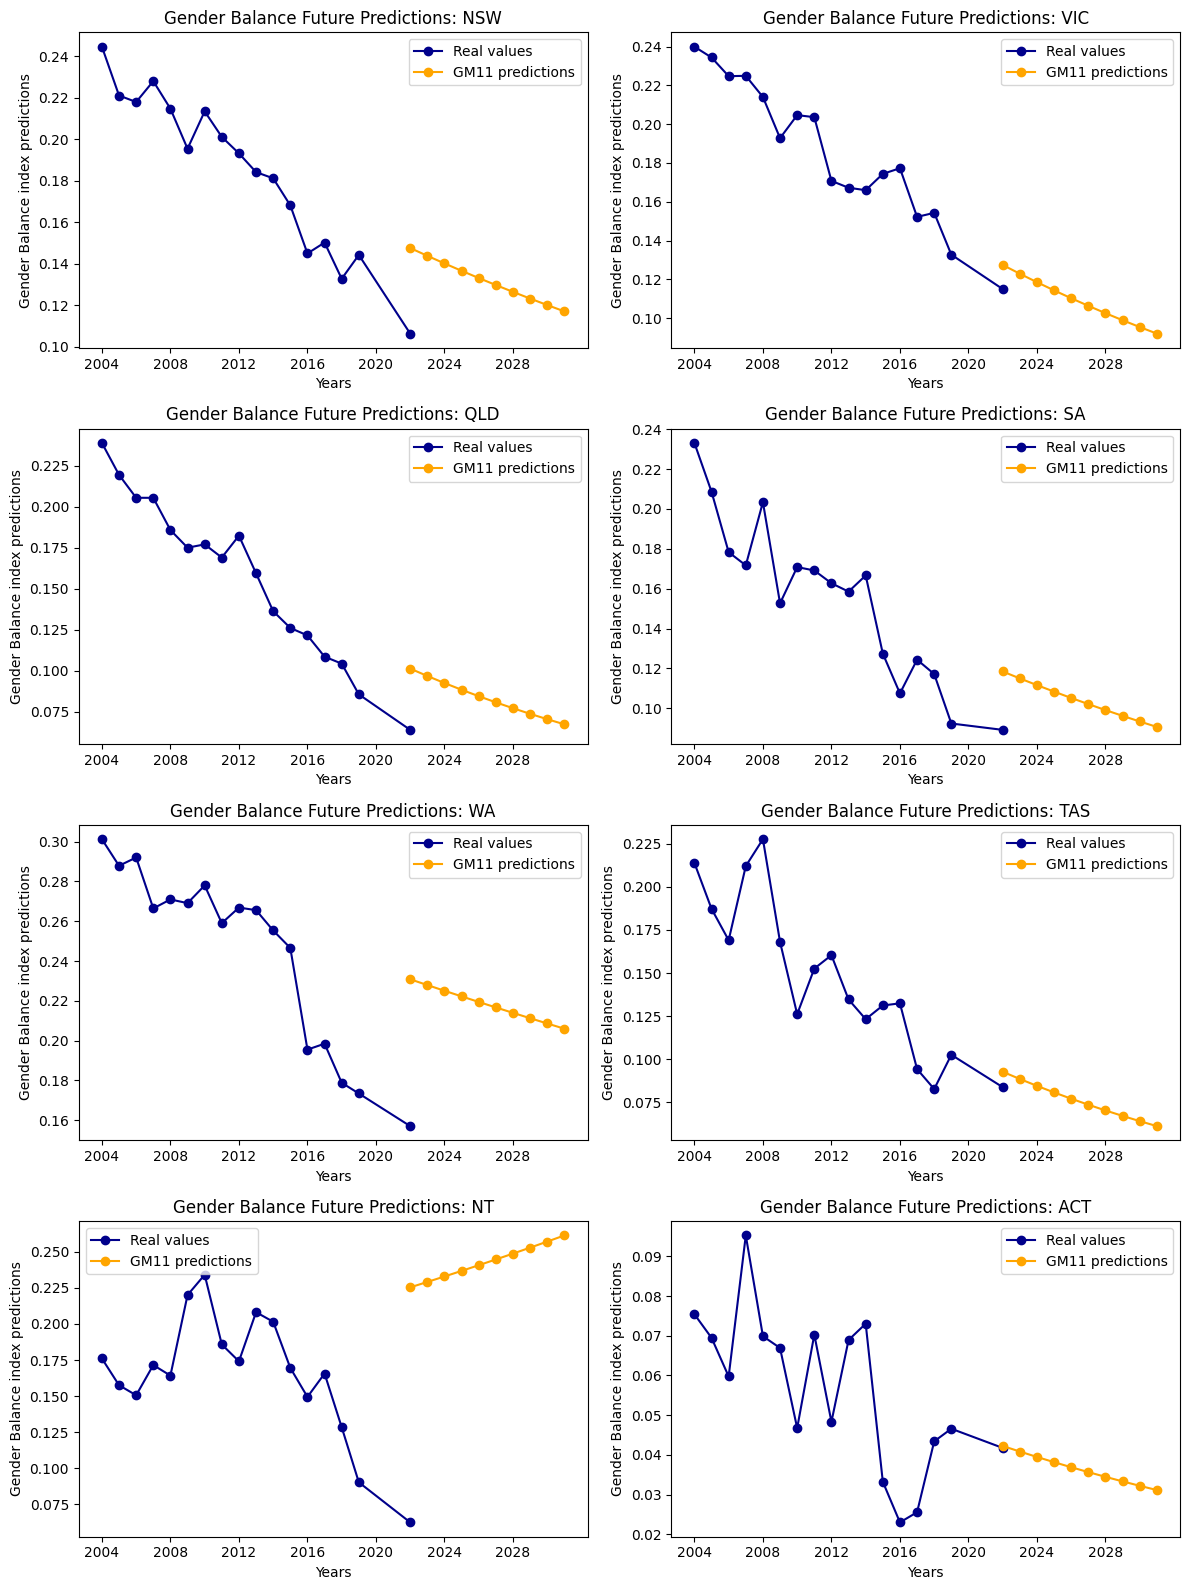

In [ ]:
# Define the list of territories for the second dataset
territories_au = list(real_values.columns.values)  # Replace df_2 with your second dataset

# Create subplots with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each territory
for i, state in enumerate(territories_au):
    # Plot real data from the first dataset
    axs[i].plot(real_values.index, real_values[state], label='Real values',color='darkblue',  marker='o')
    # Plot predictions from the first dataset
    axs[i].plot(pred_10_years.index, pred_10_years[state], label='GM11 predictions', color='orange', marker='o')
    # Set x-axis ticks and labels from 2004 to 2022 in steps of 2
    axs[i].set_xticks(ticks=np.arange(2004, 2032, 4))
    axs[i].set_xticklabels(labels=np.arange(2004, 2032, 4))



    # Set labels and title
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Gender Balance index predictions')
    axs[i].set_title(f'Gender Balance Future Predictions: {state}')
    # Add legend
    axs[i].legend()
    # Hide grid
    axs[i].grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Save Future Predictions

Save the predictions in case it could be necessary.

In [ ]:
# pred_5_years.to_csv("future_pred_GM11.csv")
# files.download('future_pred_GM11.csv')